In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import display, Image, Markdown

from serpparser import change_positions

In [3]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [176]:
names=['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [175]:
%store -r organic
%store -r positions

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [177]:
curr_month = data.index[-1][0]
data.ix[curr_month]

,geo,url,note,cost,duration
0,both,https://sape.ru,биржа арендных ссылок,2019.00,1
1,both,https://etxt.biz,тексты,2605.80,1
2,both,https://ru.depositphotos.com/,фотосток,610.69,1
3,msk,http://detochka.ru/articles/a_zamuzh_beremennoy/,,4500.00,12
4,msk,https://collections.yandex.ru/user/love-foreve...,+500 карточек,3552.20,12
5,msk,http://www.urasvadba.ru/4062,,1009.50,1
6,spb,http://www.urasvadba.ru/svadebnye-statyi/77,,606.30,1
7,msk,http://msk.svadba-vals.ru/maps/svadebnye-platj...,аггрегатор,6060.00,6
8,both,http://zbulvar.ru/affiche/populyarnaya-moskovs...,пакетный пост-релиз,7000.00,12
9,both,http://uv-kurier.ru/2017/10/02/%D0%BF%D0%BE%D0...,,2500.00,12


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными.

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию.

### Расходы в разрезе регионов за текущий период

In [186]:
#data.groupby('reg')[['cost']].sum()
pd.pivot_table(data.ix[curr_month], values='cost', index=['geo'], 
                        aggfunc=sum, margins=True).to_frame()

,cost
geo,
both,22235.49
msk,24678.00
spb,8233.55
All,55147.04


## 2. Анализ трафика

### 2.1. LOVE-FOREVER.RU

Таблица с данными по величине поискового трафика c 2016 года и его изменениям к месяцу и году.

In [174]:
# organic = organic.applymap(lambda x: '{:.2f}'.format(x))
organic['msk']['2016':'2017']

,traffic,MoM,YoY
2016-01-31,16046.0,43.794247,345.598445
2016-02-29,17191.0,7.135735,303.355232
2016-03-31,17825.0,3.687976,149.964942
2016-04-30,17671.0,-0.863955,85.541789
2016-05-31,18611.0,5.319450,35.826887
2016-06-30,18821.0,1.128365,20.477532
2016-07-31,17058.0,-9.367196,2.235541
2016-08-31,15728.0,-7.796928,-0.487188
2016-09-30,13497.0,-14.184893,-6.891556
2016-10-31,11486.0,-14.899607,-17.265721


**Комментарий:** наблюдается спад, незначительно (на 3%) превышающий сезонный коэфициент. Колебания в пределах нормы.

### Линейная диаграмма изменения трафика

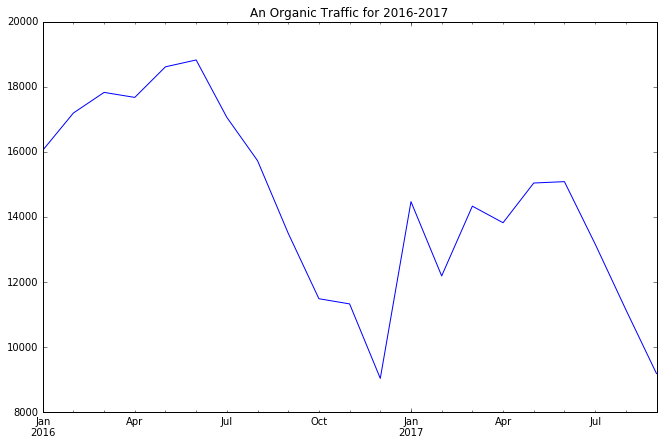

In [158]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['msk']['2016':'2017'].traffic.plot(ax=ax)
ax.set_title('An Organic Traffic for 2016-2017')

**Источник:** https://metrika.yandex.ru

<p><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

### Подсветка данных

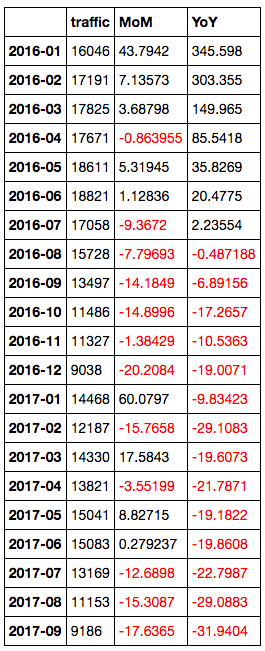

In [169]:
display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

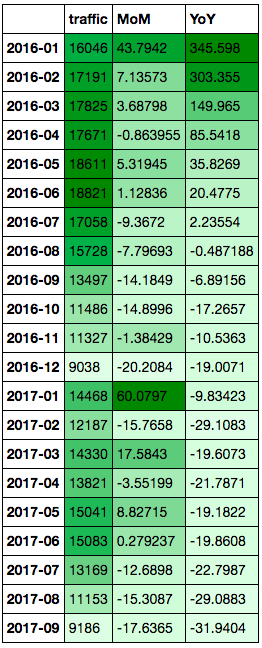

In [170]:
display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [159]:
negative_MoM = organic['msk']['MoM'] < 0

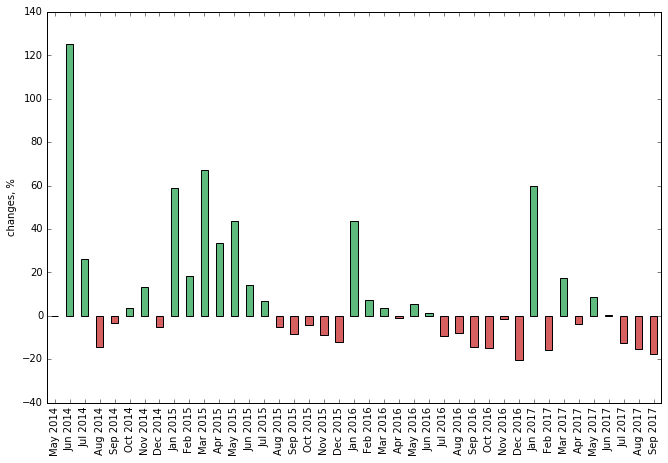

In [161]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['msk'].MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fba7d'}));
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic['msk'].index]);

На диаграмме чётко видна сезонная волатильность поискового трафика.

### 2.2. SPB.LOVE-FOREVER.RU

Таблица с данными по органическому трафику с марта 2017

In [164]:
MoM = organic['spb'].traffic.pct_change(1) * 100; organic['spb']['MoM'] = MoM
organic['spb']

,traffic,MoM
2017-04-30,508.0,NaN
2017-05-31,998.0,96.456693
2017-06-30,1296.0,29.859719
2017-07-31,1259.0,-2.854938
2017-08-31,1065.0,-15.409055
2017-09-30,1242.0,16.619718


**Комментарий:** наблюдается рост **↑17%** по отношению к предыдущему месяцу.

## 3. Анализ позиций

### 3.1. LOVE-FOREVER.RU

#### Позиции с интервалом в 7-10 дней
Выборка за сентябрь-октябрь

In [166]:
All = slice(None)

In [179]:
change_positions(positions['msk'].loc[(slice('2017-09','2017-10'), All), All])

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-09-03 вечерние платья               51          26            39   
           свадебные платья               2           5            12   
           свадебный салон               20          11             1   
2017-09-11 вечерние платья               51          28            22   
           свадебные платья               1           4             5   
           свадебный салон               35          18             1   
2017-09-19 вечерние платья               51          34            51   
           свадебные платья               2           8             5   
           свадебный салон               23          20             1   
2017-09-25 вечерние платья               51          24            39   
           свадебные платья               2           3             8   
           свадебный салон               35          17             1   
2017-10-03 вечерние платья               51          15            51   
           свадебные платья               2           7            21   
           свадебный салон               24          16             1   
2017-10-10 вечерние платья               51          44            31   
           свадебные платья               2           4             5   
           свадебный салон               14          25             1   
2017-10-17 вечерние платья               51          25            37   
           свадебные платья               2           4             8   
           свадебный салон               32          20             1   
2017-10-25 вечерние платья               51    ↑20 (+5)      ↓39 (-2)   
           свадебные платья               2     ↓5 (-1)      ↓14 (-6)   
           свадебный салон         ↑25 (+7)    ↑18 (+2)       ↓2 (-1)   

                            salon-love-forever.ru  
2017-09-03 вечерние платья                     24  
           свадебные платья                    51  
           свадебный салон                     37  
2017-09-11 вечерние платья                     13  
           свадебные платья                    43  
           свадебный салон                     12  
2017-09-19 вечерние платья                     14  
           свадебные платья                    44  
           свадебный салон                     19  
2017-09-25 вечерние платья                     11  
           свадебные платья                    46  
           свадебный салон                     22  
2017-10-03 вечерние платья                     22  
           свадебные платья                    43  
           свадебный салон                     11  
2017-10-10 вечерние платья                      7  
           свадебные платья                    44  
           свадебный салон                     11  
2017-10-17 вечерние платья                      7  
           свадебные платья                     9  
           свадебный салон                     23  
2017-10-25 вечерние платья                ↑6 (+1)  
           свадебные платья              ↓11 (-2)  
           свадебный салон              ↑11 (+12)

**Комментарий:** релевантность документа /wedding/ скакнула, вселедствие чего позиции значительно улучшились, но они будут прыгать туда-сюда, так как Яндекс будет измерять кликовые факторы.

#### Среднее значение позиций по месяцам и его изменение

In [180]:
change_positions(positions['msk'].unstack().resample('M', 
                            kind='period').mean().applymap(lambda x: round(x)).stack())

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-06 вечерние платья               51          23            44   
        свадебные платья               3           6            12   
        свадебный салон               15           4            11   
2017-07 вечерние платья               51          19            45   
        свадебные платья               2           5            19   
        свадебный салон               12           4             5   
2017-08 вечерние платья               51          26            44   
        свадебные платья               2           6            10   
        свадебный салон               38          23            13   
2017-09 вечерние платья               51          28            38   
        свадебные платья               2           5             8   
        свадебный салон               28          16             1   
2017-10 вечерние платья               51    ↑26 (+2)      ↓40 (-2)   
        свадебные платья               2           5      ↓12 (-4)   
        свадебный салон         ↑24 (+4)    ↓20 (-4)             1   

                         salon-love-forever.ru  
2017-06 вечерние платья                     14  
        свадебные платья                    17  
        свадебный салон                      4  
2017-07 вечерние платья                     14  
        свадебные платья                    11  
        свадебный салон                      8  
2017-08 вечерние платья                     27  
        свадебные платья                    37  
        свадебный салон                     23  
2017-09 вечерние платья                     16  
        свадебные платья                    46  
        свадебный салон                     22  
2017-10 вечерние платья               ↑10 (+6)  
        свадебные платья             ↑27 (+19)  
        свадебный салон               ↑14 (+8)

### 3.2. SPB.LOVE-FOREVER.RU

In [185]:
# Перемещение столбца spb.salon-love-forever.ru в крайнюю правую часть таблицы
cols = positions['spb'].columns.tolist()
indx = cols.index('spb.salon-love-forever.ru')
cols.append(cols.pop(indx))

In [183]:
change_positions(positions['spb'][cols].loc[(slice('2017-09','2017-10'), All), All])

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-09-03 вечерние платья             25            30                51   
           свадебные платья            23            25                19   
           свадебный салон             46            36                 7   
2017-09-11 вечерние платья              5            51                51   
           свадебные платья             4            51                14   
           свадебный салон              9            51                 4   
2017-09-19 вечерние платья              5            51                51   
           свадебные платья             5            23                 7   
           свадебный салон             17            51                 6   
2017-09-25 вечерние платья              3            51                51   
           свадебные платья             2            22                17   
           свадебный салон              4            51                19   
2017-10-03 вечерние платья              2            51                51   
           свадебные платья             3             2                24   
           свадебный салон              4            51                23   
2017-10-10 вечерние платья              4             7                51   
           свадебные платья             6             3                 9   
           свадебный салон              8            51                13   
2017-10-17 вечерние платья              3             2                51   
           свадебные платья             4             1                15   
           свадебный салон              3            51                19   
2017-10-25 вечерние платья        ↑2 (+1)       ↓5 (-3)                51   
           свадебные платья             4       ↓2 (-1)          ↓21 (-6)   
           свадебный салон        ↑2 (+1)            51          ↓21 (-2)   

                            vbelom.ru vesnawedding.ru  \
2017-09-03 вечерние платья         22              51   
           свадебные платья        30               1   
           свадебный салон          1               8   
2017-09-11 вечерние платья         20              51   
           свадебные платья        13               1   
           свадебный салон          1               5   
2017-09-19 вечерние платья         18              51   
           свадебные платья        14               1   
           свадебный салон          1               7   
2017-09-25 вечерние платья          7              51   
           свадебные платья         6               1   
           свадебный салон          1               2   
2017-10-03 вечерние платья         11              51   
           свадебные платья         6               1   
           свадебный салон          1               3   
2017-10-10 вечерние платья          8              51   
           свадебные платья        18               1   
           свадебный салон          1               5   
2017-10-17 вечерние платья         10              51   
           свадебные платья         9               2   
           свадебный салон          1               2   
2017-10-25 вечерние платья    ↑9 (+1)              51   
           свадебные платья         9         ↑1 (+1)   
           свадебный салон          1         ↓3 (-1)   

                            spb.salon-love-forever.ru  
2017-09-03 вечерние платья                         24  
           свадебные платья                        11  
           свадебный салон                         51  
2017-09-11 вечерние платья                          8  
           свадебные платья                         2  
           свадебный салон                         15  
2017-09-19 вечерние платья                          9  
           свадебные платья                        11  
           свадебный салон                         14  
2017-09-25 вечерние платья                         29  
           свадебные платья                         9  
    

#### Среднее значение позиций по месяцам и его изменение

In [184]:
change_positions(positions['spb'][cols].unstack().resample('M', 
                                kind='period').mean().applymap(lambda x: round(x)).stack())

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-08 вечерние платья              5            25                51   
        свадебные платья             2            26                21   
        свадебный салон             25            40                 7   
2017-09 вечерние платья             10            46                51   
        свадебные платья             8            30                14   
        свадебный салон             19            47                 9   
2017-10 вечерние платья        ↑3 (+7)     ↑16 (+30)                51   
        свадебные платья       ↑4 (+4)      ↑2 (+28)          ↓17 (-3)   
        свадебный салон       ↑4 (+15)      ↓51 (-4)         ↓19 (-10)   

                         vbelom.ru vesnawedding.ru spb.salon-love-forever.ru  
2017-08 вечерние платья         32              51                        35  
        свадебные платья        24               1                        23  
        свадебный салон          2               6                        45  
2017-09 вечерние платья         17              51                        18  
        свадебные платья        16               1                         8  
        свадебный салон          1               6                        27  
2017-10 вечерние платья   ↑10 (+7)              51                  ↓26 (-8)  
        свадебные платья  ↑10 (+6)               1                   ↑6 (+2)  
        свадебный салон          1         ↑3 (+3)                  ↑24 (+3)

**Источник:** https://xml.yandex.ru

Позиции в таблице и в текущей выдаче Яндекса могут отличаться из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.